In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as path_effects
import seaborn as sns

# Data Visualization

### Load the data

In [38]:
df = pd.read_csv('dataset/spotify_songs_restructured_cleaned.csv', sep=',')
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,danceability,energy,key,loudness,speechiness,liveness,valence,tempo,duration_ms,popularity_category,tempo_category,loudness_category,release_month
0,Memories - Dillon Francis Remix,Maroon 5,67.0,Memories (Dillon Francis Remix),2019-12-13 00:00:00,pop,0.726000,0.815,11.000000,-4.969000,0.03730,0.357000,0.693,120.757315,162600.0,Medium Popularity,Fast,Loud,December
1,Call You Mine - Keanu Silva Remix,The Chainsmokers,60.0,Call You Mine - The Remixes,2019-07-19 00:00:00,pop,0.718000,0.930,7.000000,-3.778000,0.10200,0.204000,0.277,121.956000,169093.0,Medium Popularity,Fast,Loud,July
2,Someone You Loved - Future Humans Remix,Lewis Capaldi,69.0,Someone You Loved (Future Humans Remix),2019-03-05 00:00:00,pop,0.650000,0.833,1.000000,-4.672000,0.03590,0.191022,0.725,123.976000,189052.0,Medium Popularity,Fast,Loud,March
3,Never Really Over - R3HAB Remix,Katy Perry,62.0,Never Really Over (R3HAB Remix),2019-07-26 00:00:00,pop,0.449000,0.856,5.000000,-4.788000,0.10645,0.176000,0.152,112.648000,187675.0,Medium Popularity,Moderate,Loud,July
4,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69.0,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29 00:00:00,pop,0.542000,0.903,4.000000,-2.419000,0.04340,0.191022,0.367,127.936000,207619.0,Medium Popularity,Fast,Loud,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20908,Hey Brother,Avicii,20.0,True,2013-01-01 00:00:00,edm,0.654245,0.780,7.000000,-4.867000,0.04360,0.082800,0.458,125.014000,255093.0,Low Popularity,Fast,Loud,January
20909,Many Ways - Radio Edit,Ferry Corsten feat. Jenny Wahlstrom,27.0,Many Ways,0,edm,0.654245,0.640,5.000000,-8.367000,0.03650,0.572000,0.288,128.001000,196993.0,Low Popularity,Fast,Moderate,NaN
20910,City Of Lights - Official Radio Edit,Lush & Simon,42.0,City Of Lights (Vocal Mix),2014-04-28 00:00:00,edm,0.428000,0.922,2.000000,-1.814000,0.09360,0.066800,0.210,128.170000,204375.0,Medium-Low Popularity,Fast,Loud,April
20911,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20.0,Closer Remixed,2013-03-08 00:00:00,edm,0.522000,0.786,5.377047,-4.462000,0.04200,0.375000,0.400,128.041000,353120.0,Low Popularity,Fast,Loud,March


### Popularity Distribution over genres

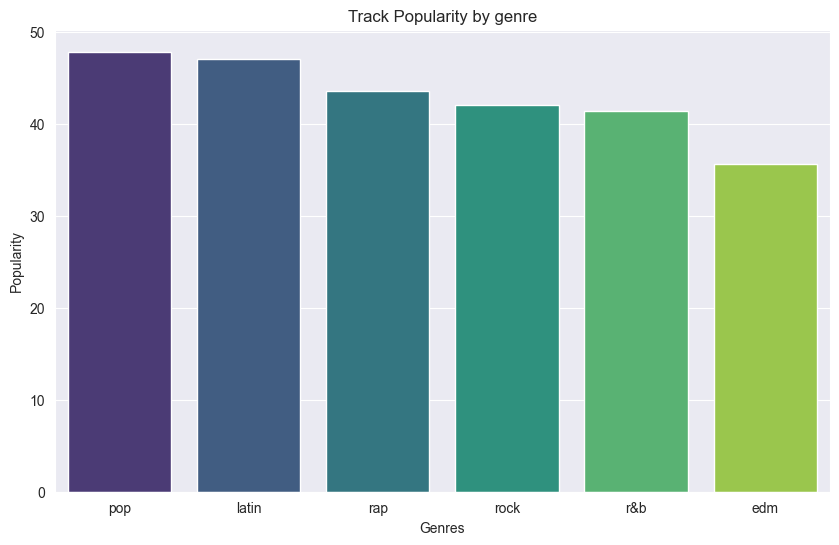

In [39]:
data = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=False)

plt.title('Track Popularity by genre')
plt.xlabel('Genres')
plt.ylabel('Popularity')

plt.show()

### Popularity Distribution over months

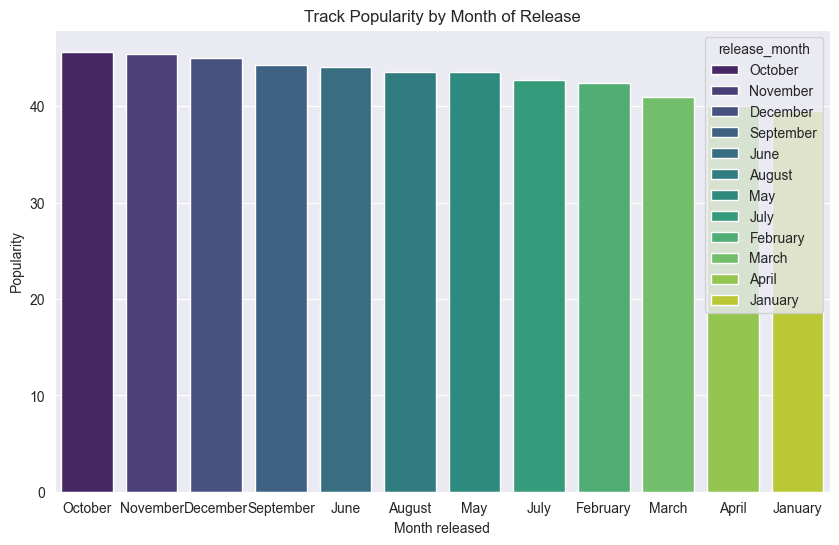

In [40]:
data = df.groupby('release_month')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=True
            )

plt.title('Track Popularity by Month of Release')
plt.xlabel('Month released')
plt.ylabel('Popularity')

plt.show()

### Total Tracks per Genre

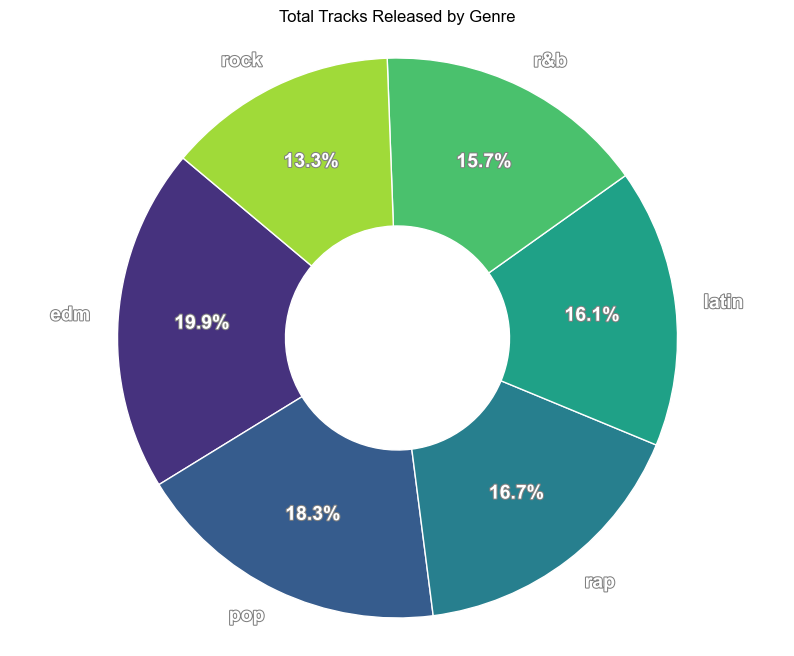

In [41]:
genre_counts = df['playlist_genre'].value_counts()

def add_outline(text, linewidth=1.5, foreground='grey'):
    text.set_path_effects([path_effects.Stroke(linewidth=linewidth, foreground=foreground), path_effects.Normal()])

# Plot the donut chart
fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140,
                                  colors=sns.color_palette('viridis', len(genre_counts)),
                                  textprops={'color': 'white', 'weight': 'bold', 'fontsize': 14},
                                  wedgeprops={'width': 0.6}, pctdistance=0.7)

# Add outline to the text
for text in texts + autotexts:
    add_outline(text)

plt.title('Total Tracks Released by Genre', color='black')
plt.axis('equal')
plt.show()

### Tempo Distribution by Year

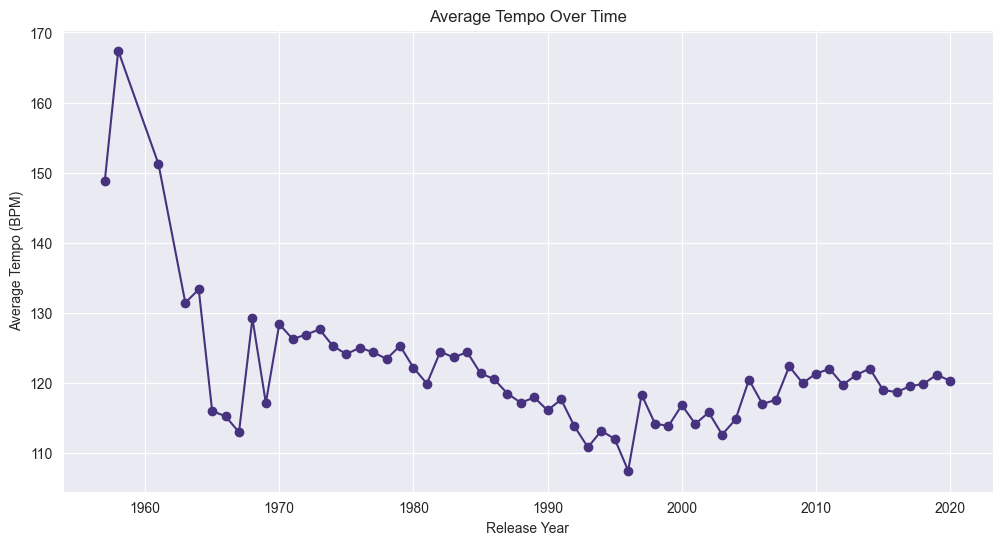

In [42]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

colors=sns.color_palette('viridis', len(genre_counts))

tempo_over_time = df.groupby(df['track_album_release_date'].dt.year)['tempo'].mean()


plt.figure(figsize=(12, 6))
tempo_over_time.plot(kind='line', marker='o', color=colors)
plt.title('Average Tempo Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo (BPM)')
plt.show()

### Popularity Categories Distribution 

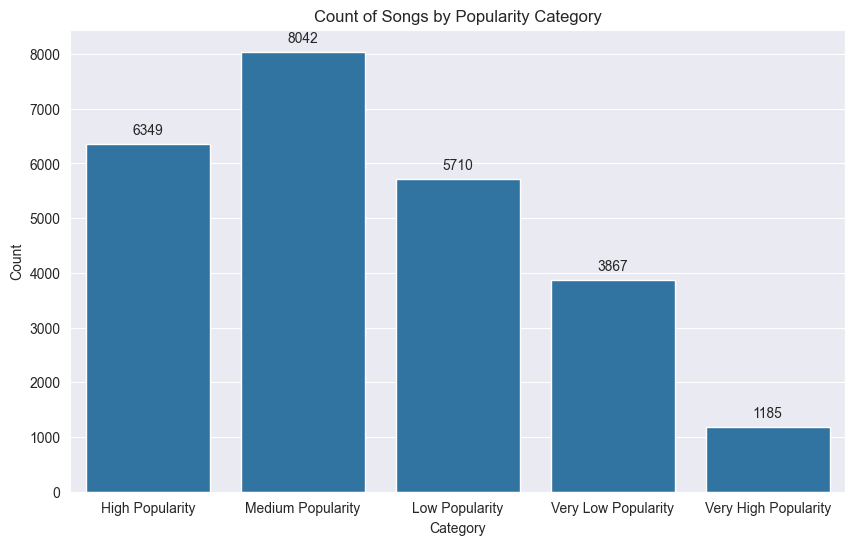

In [43]:
category_counts = df['popularity_category'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='popularity_category')
plt.title('Count of Songs by Popularity Category')
plt.xlabel('Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Tempo Categories Distribution

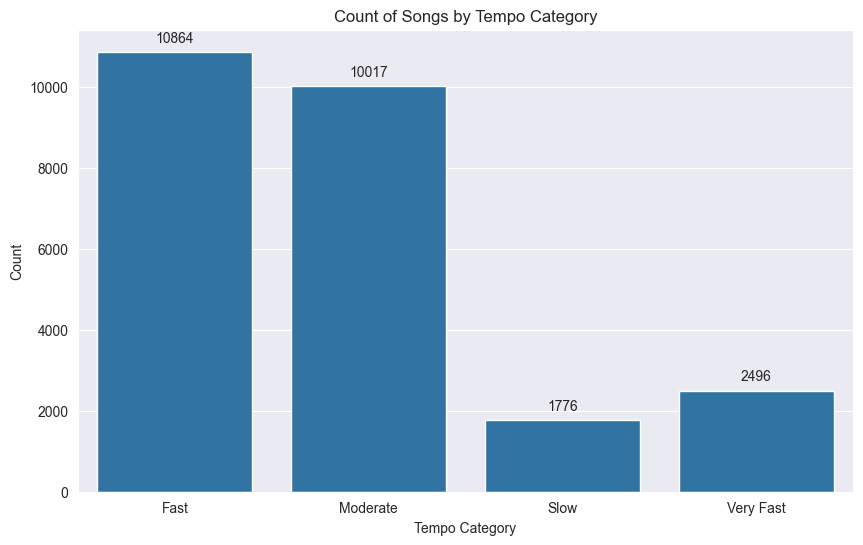

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='tempo_category')
plt.title('Count of Songs by Tempo Category')
plt.xlabel('Tempo Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Loudness Categories Distribution

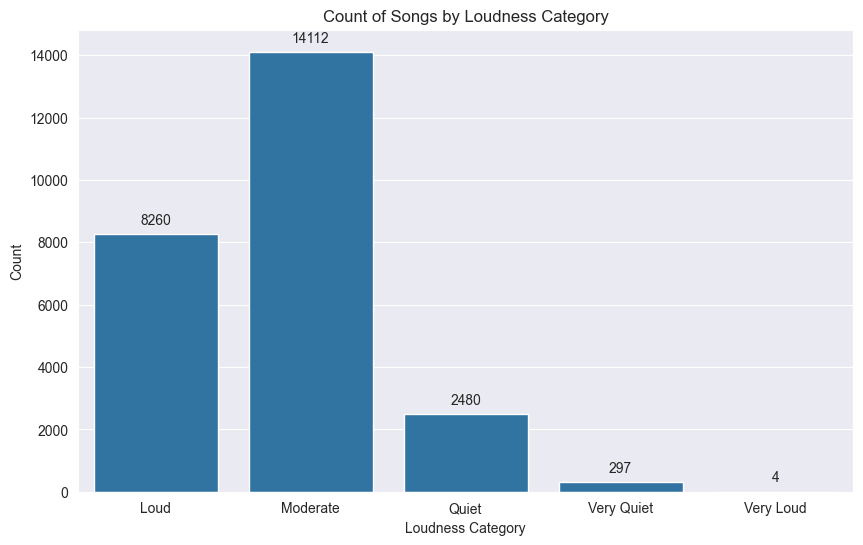

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='loudness_category')
plt.title('Count of Songs by Loudness Category')
plt.xlabel('Loudness Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()